# Import the Libraries

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset

In [4]:
data = pd.read_csv(r'D:\Case Study 2\Country-data.csv')

In [5]:
data.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


# Let's explore the data 

In [6]:
data.shape

(167, 10)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


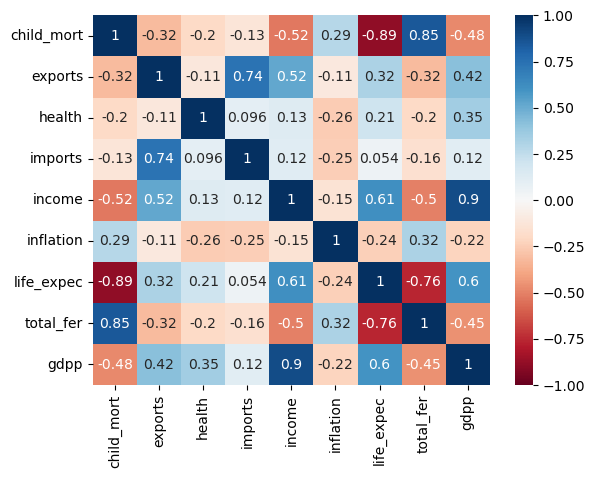

In [8]:
# Correlation Heatmap

sns.heatmap(data.corr(numeric_only= True), annot = True, vmin = -1, cmap = 'RdBu')
plt.show()

# Visualize the data

In [10]:
# Before we begin visualization let's convert country to index (as it's a redundant column)

data.set_index('country', inplace = True)
data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


# Univariate Analysis

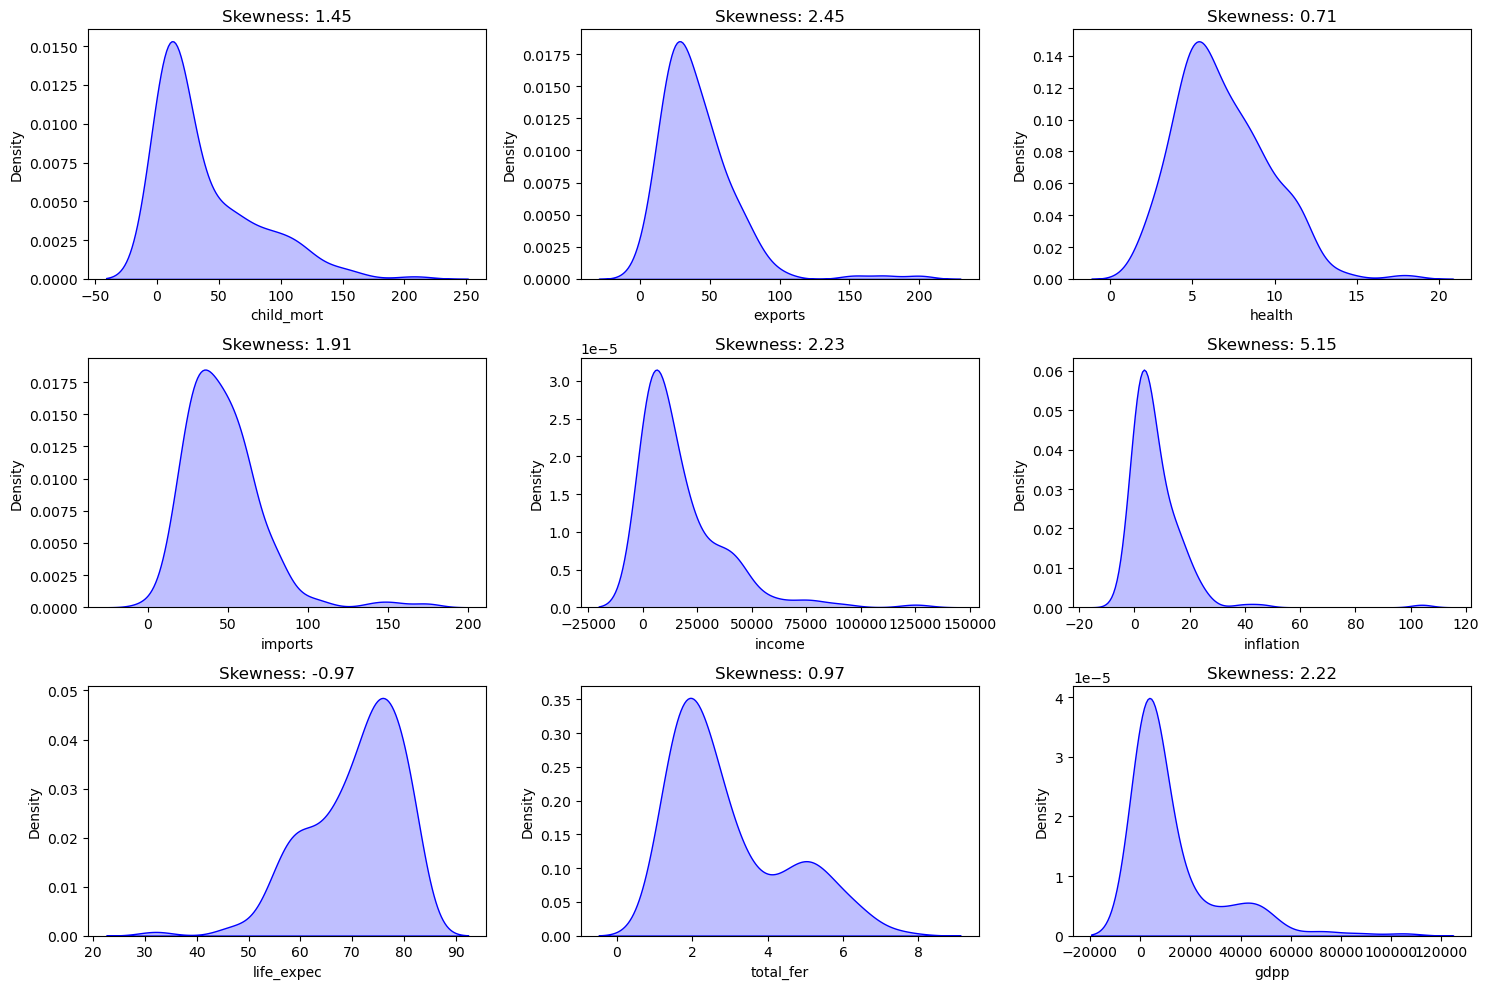

In [12]:
# KDE Plot to check the distribution

t = 1
plt.figure(figsize = (15,10))

for i in data.columns:
  plt.subplot(3,3,t)
  sns.kdeplot(data = data, x = i, fill = True, color = 'blue')
  plt.title(f'Skewness: {round(data[i].skew(),2)}')
  t+=1
plt.tight_layout()
plt.show()

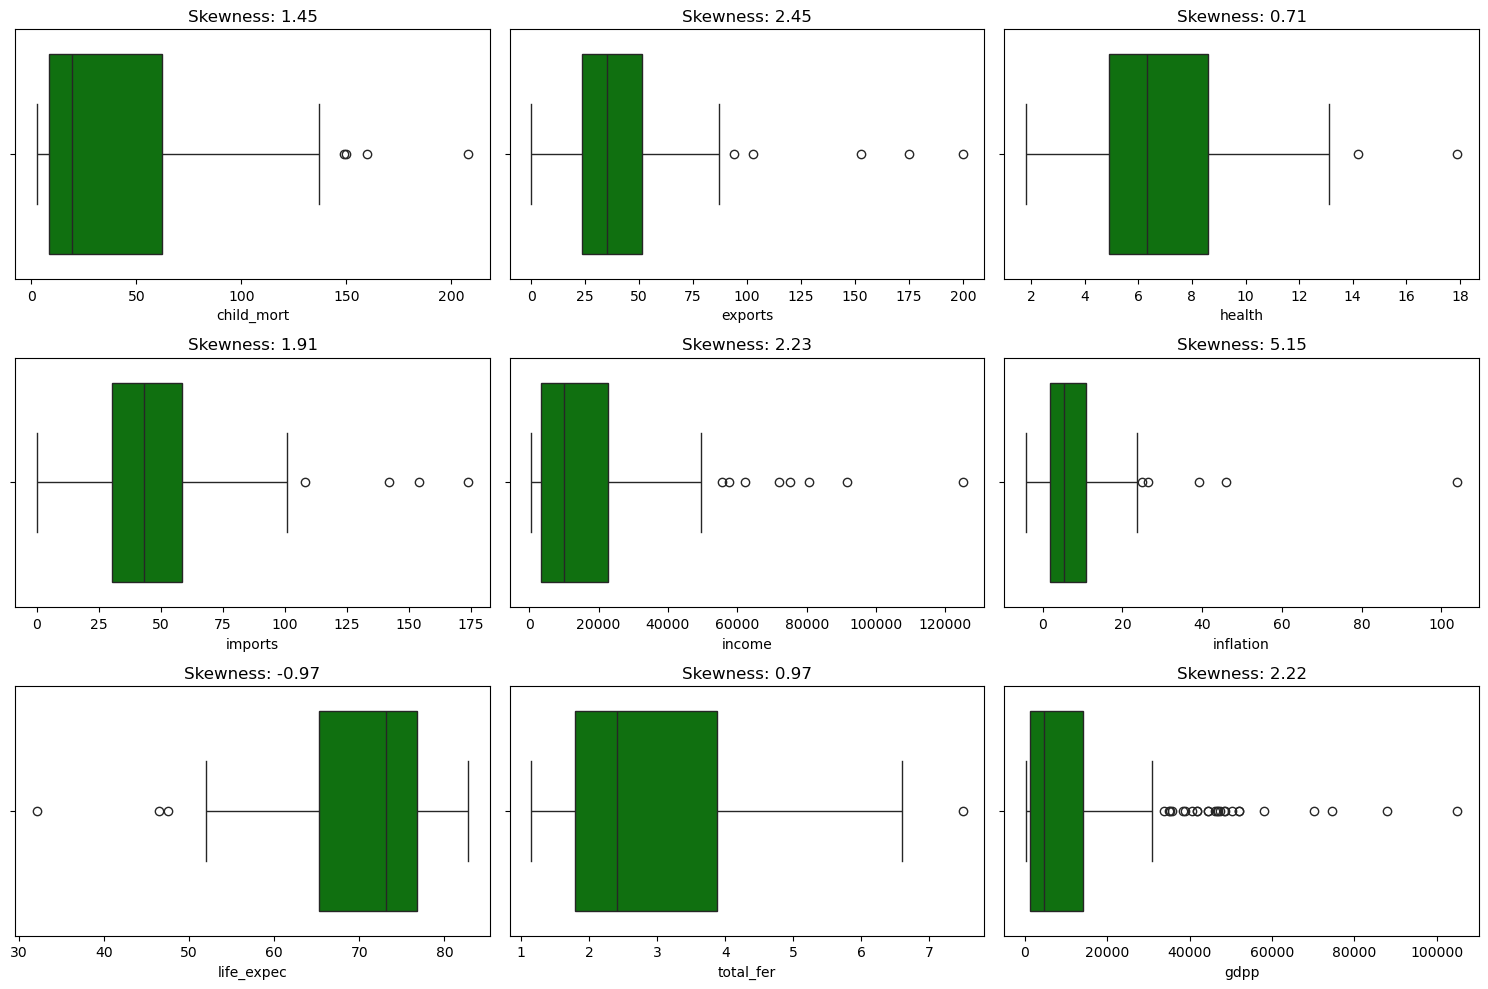

In [13]:
# Boxplot to visualise the outliers

t = 1
plt.figure(figsize = (15,10))

for i in data.columns:
  plt.subplot(3,3,t)
  sns.boxplot(data = data, x = i, color = 'green')
  plt.title(f'Skewness: {round(data[i].skew(),2)}')
  t+=1
plt.tight_layout()
plt.show()

# Multivariate Analysis

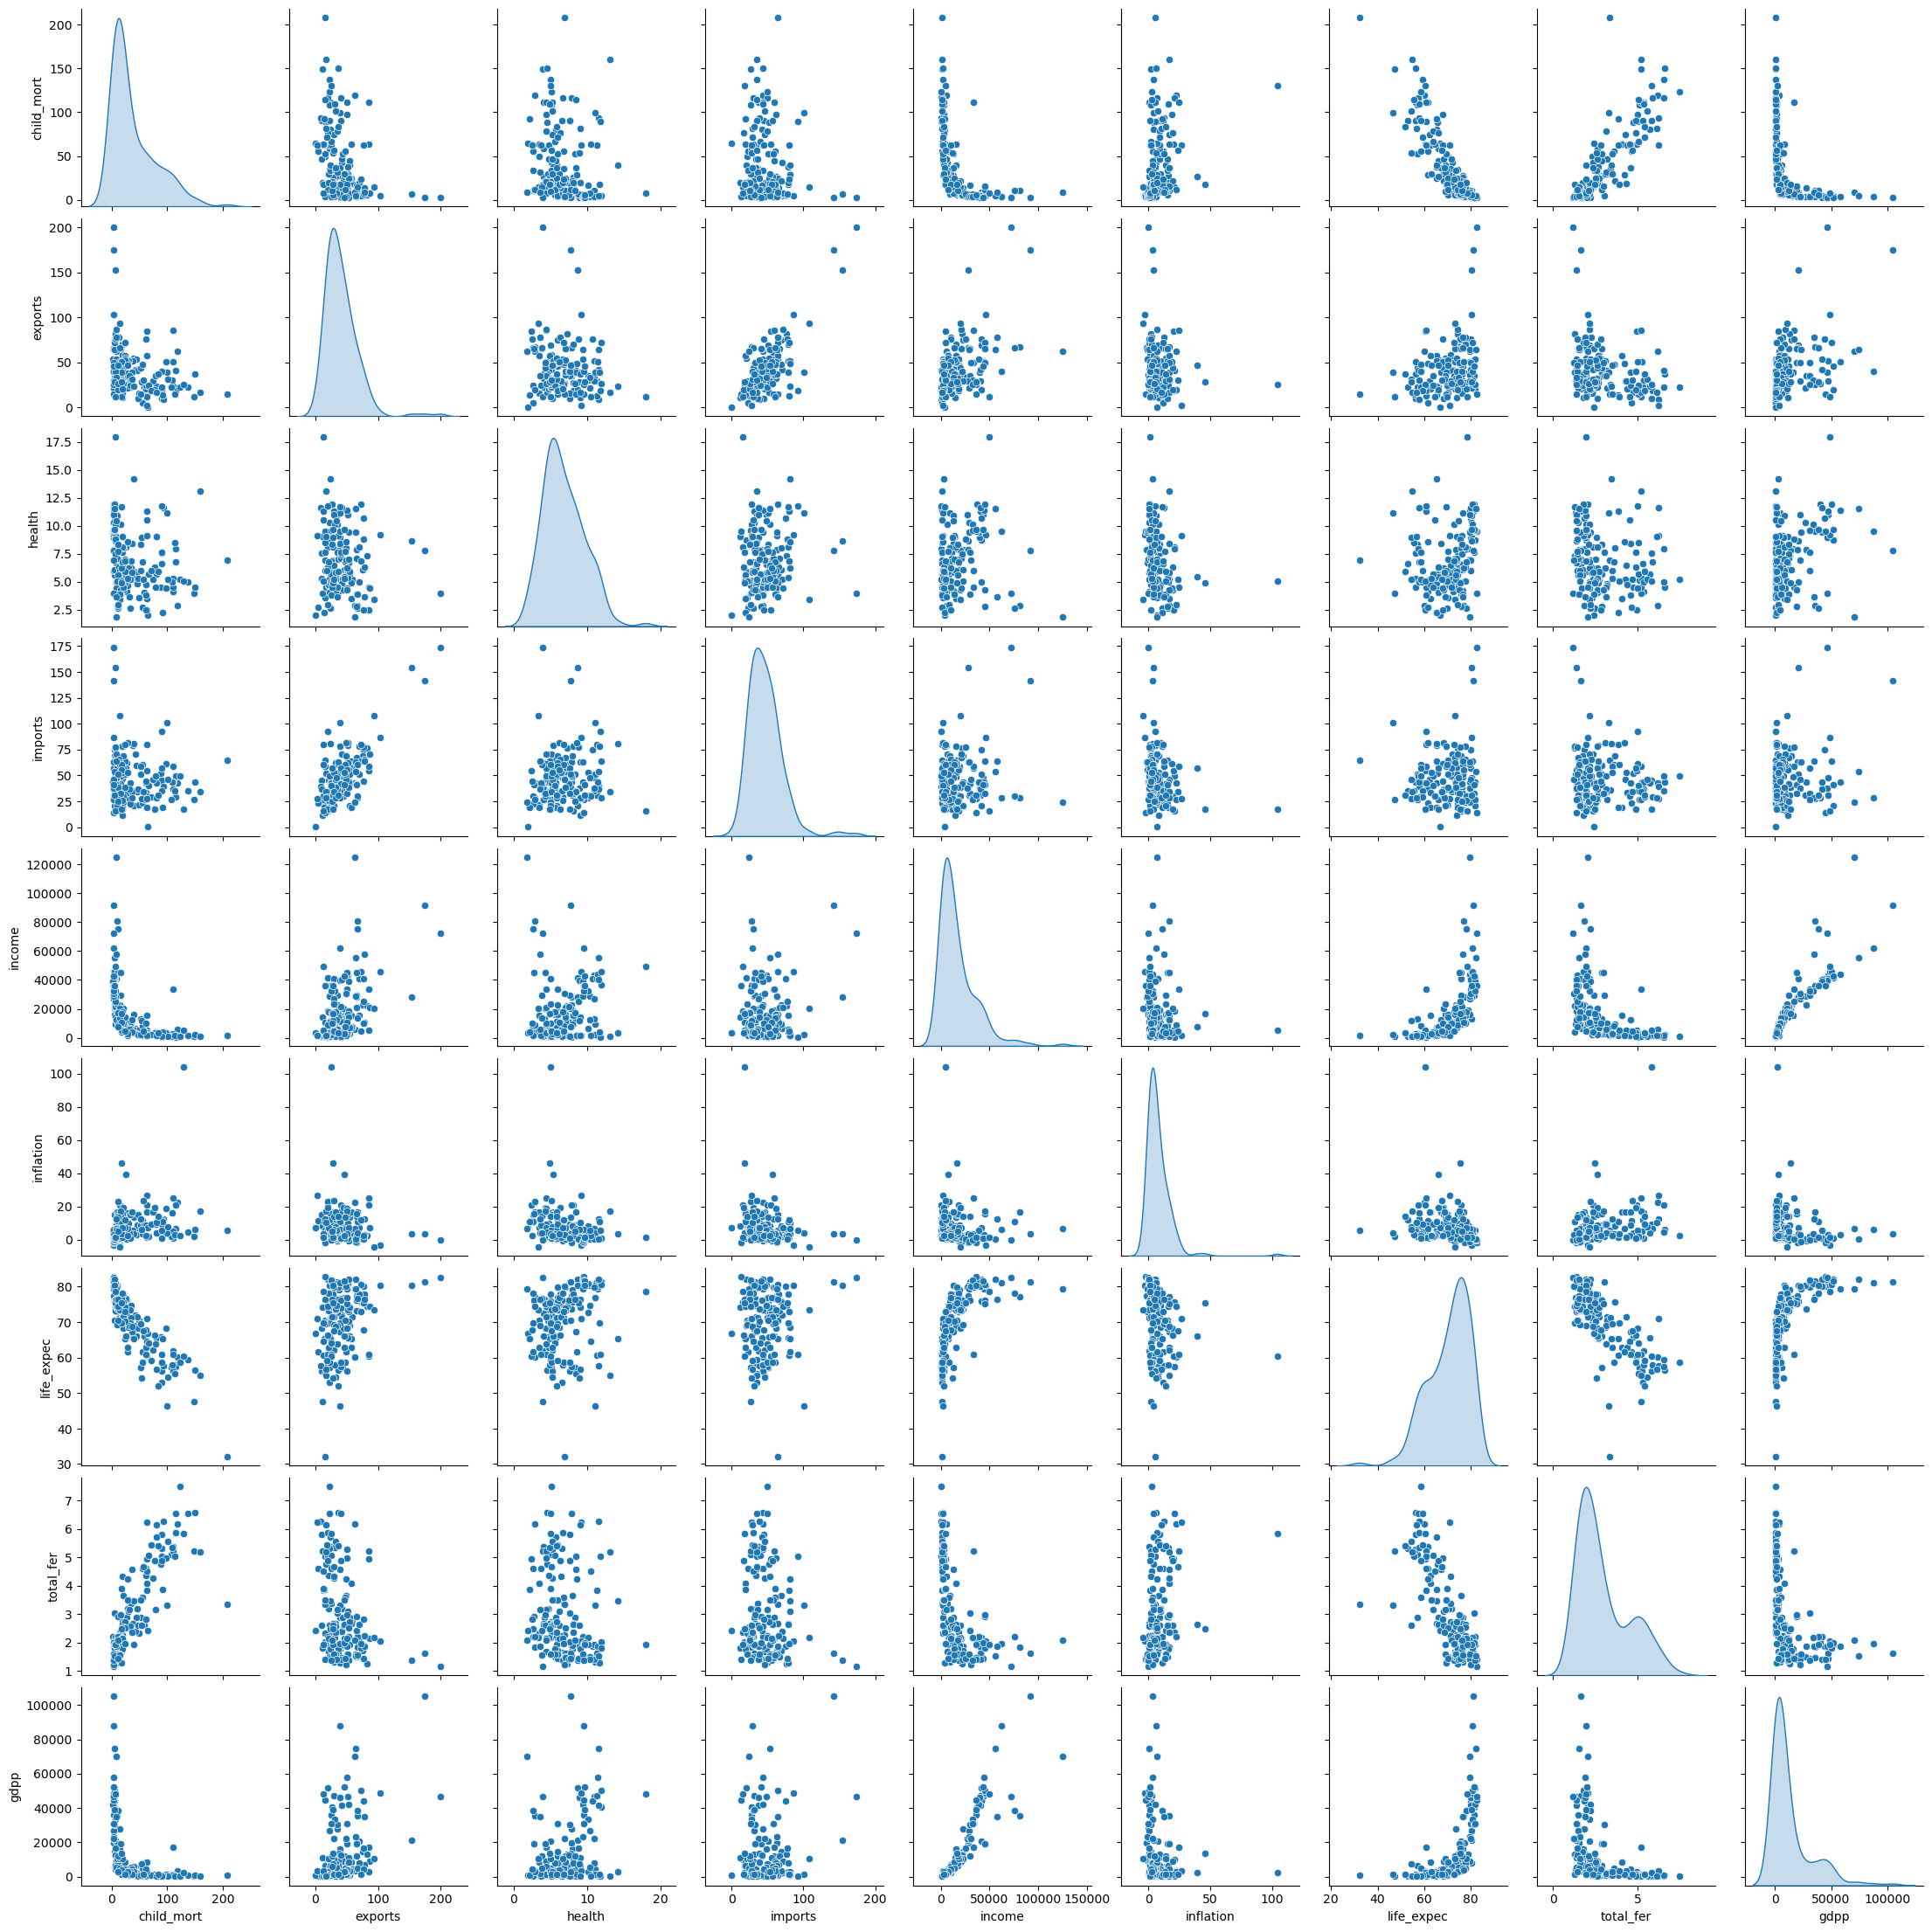

In [14]:
# Pairplot

sns.pairplot(data, diag_kind = 'kde')
plt.show()

# Preprocessing

In [15]:
# Check for missing values

data.isnull().sum().sum()

0

Inference: Data has no missing values

In [16]:
# Let's treat the extreme outliers 
# We will go with Capping using IQR Method
# In order to cap only the extreme ones, let's keep whisker length = 2.5

for i in data.columns:
  q1, q3 = np.quantile(data[i], [0.25, 0.75])
  iqr = q3 - q1
  ul, ll = q3 + 2.5 * iqr, q1 - 2.5 * iqr
  data[i] = data[i].apply(lambda x: ul if x > ul else ll if x < ll else x)

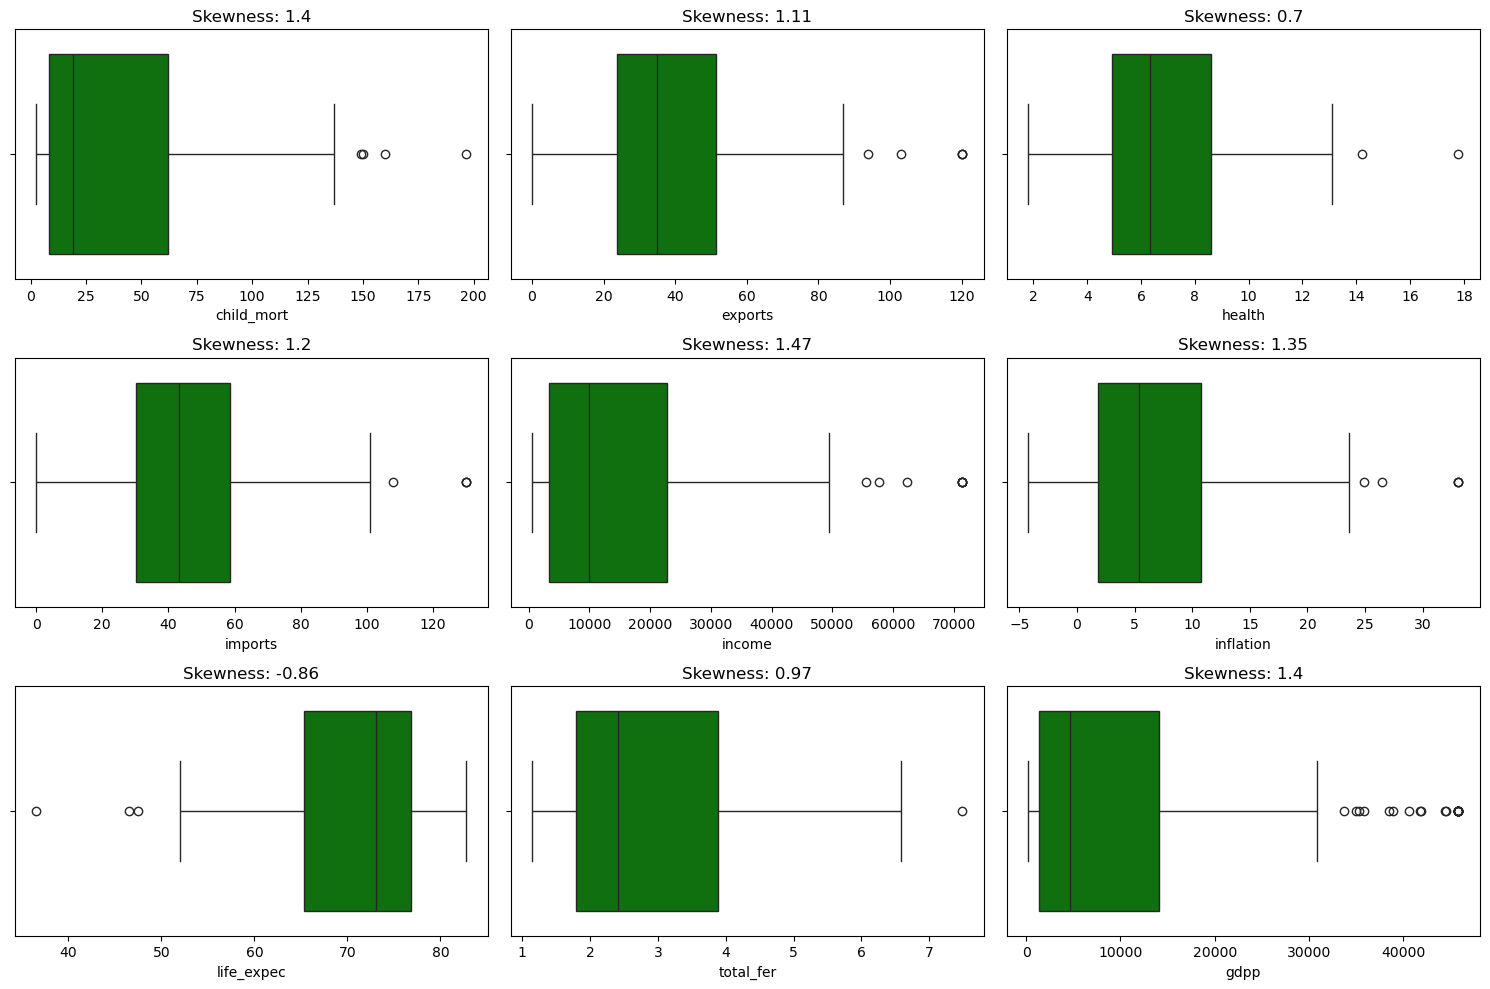

In [17]:
# Let's check if outliers have been treated 

t = 1
plt.figure(figsize = (15,10))

for i in data.columns:
  plt.subplot(3,3,t)
  sns.boxplot(data = data, x = i, color = 'green')
  plt.title(f'Skewness: {round(data[i].skew(),2)}')
  t+=1
plt.tight_layout()
plt.show()

In [ ]:
# Let's apply PCA on the data before we proceed with clustering. Just to have better visualization and better clustering.
# In PCA, we need to pass Standardized Data. So, let's import the functions from libraries.

